<a href="https://colab.research.google.com/github/igorvgp/Technical_test-DS/blob/main/Notebook_Enem_2017.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Bibliotecas




In [ ]:
# Instalação das bibliotecas
!pip install pandas
!pip install seaborn
!pip install matplotlib

In [1]:
# Import das bibliotecas
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

# Import Dados

## Import BR_Localidades_2010_v1

In [9]:
BR_localidades = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Enem 2017/BR_Localidades_2010_v1.xlsx',usecols=['CD_GEOCODMU','NM_MUNICIPIO','LAT','LONG'])

In [ ]:
BR_localidades.head()

,CD_GEOCODMU,NM_MUNICIPIO,LONG,LAT
0,1100015,ALTA FLORESTA D'OESTE,-61.999824,-11.935540
1,1100015,ALTA FLORESTA D'OESTE,-62.043898,-12.437239
2,1100015,ALTA FLORESTA D'OESTE,-62.175549,-12.601415
3,1100015,ALTA FLORESTA D'OESTE,-62.318650,-11.919792
4,1100015,ALTA FLORESTA D'OESTE,-62.276812,-13.079806


## Import cidades

In [7]:
cidades = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Enem 2017/cidades.csv',sep=',',encoding='utf-8')
cidades.head()

,Município,Código,Gentílico,Prefeito_2017,Área_Territorial_2018,População_estimada_pessoas_2019,Densidade_demográfica_2010,Escolarização_6_a_14_anos_%_2010,IDHMunicipal_2010,Mortalidade_infantil_óbitos_por_mil_nascidos_vivos_2017,Receitas_realizadas_×1000_2017,Despesas_empenhadas_×1000_2017,PIB_per_capita_2017
0,Adamantina,3500105,adamantinense,MÁRCIO CARDIM,"411,987",35068,"82,15","97,6","0,79","11,63","160718,6793","137083,6699","30010,56"
1,Adolfo,3500204,adolfino,IZAEL ANTONIO FERNANDES,"211,055",3562,"16,85","98,6","0,73","19,23","27333,74731","20103,87713","27634,98"
2,Aguaí,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,"474,554",36305,"67,72","95,8","0,715","16,06","84094,76006","72168,73408","26549,19"
3,Águas da Prata,3500402,pratense,CARLOS HENRIQUE FORTES DEZENA,"142,673",8180,"53,05","98,8","0,781","25,32","29390,24814","24363,40149","18974,98"
4,Águas de Lindóia,3500501,lindoiense,GILBERTO ABDOU HELOU,"60,126",18705,"287,16","96,2","0,745","8,37","86949,22213","75201,47793","25554,26"


## Import dados ENEM

In [ ]:
# Baixando os dados
!wget -P "/content/drive/MyDrive/Colab Notebooks/Enem 2017" http://download.inep.gov.br/microdados/microdados_enem2017.zip

--2021-10-08 01:09:29--  http://download.inep.gov.br/microdados/microdados_enem2017.zip
Resolving download.inep.gov.br (download.inep.gov.br)... 200.130.24.15
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://download.inep.gov.br/microdados/microdados_enem2017.zip [following]
--2021-10-08 01:09:30--  https://download.inep.gov.br/microdados/microdados_enem2017.zip
Connecting to download.inep.gov.br (download.inep.gov.br)|200.130.24.15|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 911813201 (870M) [application/zip]
Saving to: ‘/content/drive/MyDrive/Colab Notebooks/Enem 2017/microdados_enem2017.zip’

microdados_enem2017 100%[===================>] 869.57M   574KB/s    in 24m 54s 

2021-10-08 01:34:25 (596 KB/s) - ‘/content/drive/MyDrive/Colab Notebooks/Enem 2017/microdados_enem2017.zip’ saved [911813201/911813201]



In [ ]:
# Descompactando os dados
!unzip  -uq '/content/drive/MyDrive/Colab Notebooks/Enem 2017/microdados_enem2017.zip' -d '/content/drive/MyDrive/Colab Notebooks/Enem 2017'

In [8]:
# Selecionando quais colunas serão importadas através de um array
colunas_import = ['NU_INSCRICAO','NO_MUNICIPIO_RESIDENCIA','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE',\
           'NU_NOTA_CN','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','TP_SEXO','TP_COR_RACA','TP_ESCOLA',\
           'Q006']
colunas_notas = ['NU_INSCRICAO','NO_MUNICIPIO_RESIDENCIA','CO_MUNICIPIO_RESIDENCIA','SG_UF_RESIDENCIA','NU_IDADE',\
           'NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO']

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Enem 2017/Microdados Enem 2017/DADOS/MICRODADOS_ENEM_2017.csv',sep=';',encoding='ISO-8859-1',usecols = colunas_import)
enem = df[colunas_notas]

# Tratamento dos dados

In [14]:
# A decisão de remover as linhas que contém valores nulos foi tomada baseado no fato de que esses valores faltantes são referentes às pessoas que não estiveram presente em ao menos um dos dias de prova.
# Removendo linhas que não possuem valores de notas
enem.dropna(inplace = True)
df.dropna(inplace = True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
#Criando colunas de médias
enem["mean"] = (enem.iloc[:,5:10].sum(axis = 1))/5
df["mean"] = (df["NU_NOTA_CN"] + df["NU_NOTA_CN"] + df["NU_NOTA_LC"] + df["NU_NOTA_MT"] + df["NU_NOTA_REDACAO"])/5

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [16]:
BR_localidades.drop_duplicates(subset = ['CD_GEOCODMU'], inplace = True)

# Análise dos dados

In [ ]:
# Avaliando os tipos de dados presentes no df
enem.dtypes

NU_INSCRICAO                 int64
CO_MUNICIPIO_RESIDENCIA      int64
NO_MUNICIPIO_RESIDENCIA     object
SG_UF_RESIDENCIA            object
NU_IDADE                   float64
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
mean                       float64
dtype: object

##Média das notas

###Média das notas por município

In [101]:
# Agrupando os dados da tabela por município calculando a média de cada um
# Digitar o nome do município na variável "municipio" para retornar o valor da media do local
municipio = "all"
media_mun = enem.groupby('NO_MUNICIPIO_RESIDENCIA').mean().sort_values('mean', ascending = False)['mean'].reset_index()
if municipio == "all":
  print(media_mun)
else:
  print(media_mun[media_mun['NO_MUNICIPIO_RESIDENCIA'] == municipio])

       NO_MUNICIPIO_RESIDENCIA        mean
0           Santa Clara do Sul  590.102759
1               Vitória Brasil  581.248000
2                  Vila Flores  577.957333
3             São João da Mata  576.258400
4                     Valinhos  575.818275
...                        ...         ...
5293  Lagoa Grande do Maranhão  432.936636
5294                   Amaturá  429.840000
5295      Santo Antônio do Içá  426.330400
5296     São Paulo de Olivença  423.022466
5297         Benjamin Constant  417.345000

[5298 rows x 2 columns]


###Média das notas por estado

In [106]:
# Agrupando os dados da tabela por estado calculando a média de cada um
# Digitar o nome do estado na variável "estado" para retornar o valor da media do local

estado = "all"
media_est = enem.groupby('SG_UF_RESIDENCIA').mean().sort_values('mean', ascending = False)['mean'].reset_index()
if estado == "all":
  print(media_est)
else:
  print(media_est[media_est['SG_UF_RESIDENCIA'] == estado])

   SG_UF_RESIDENCIA        mean
0                SC  537.772829
1                RJ  536.707260
2                MG  535.526099
3                SP  534.354543
4                RS  532.801956
5                DF  532.794509
6                PR  531.051558
7                ES  529.445492
8                GO  521.347204
9                MS  513.352797
10               CE  511.413281
11               RN  511.194402
12               SE  509.162089
13               PE  507.966953
14               PB  507.251986
15               BA  506.333876
16               MT  502.913789
17               PI  498.992478
18               PA  497.513238
19               AL  496.818020
20               RO  496.417146
21               TO  495.623119
22               RR  495.558763
23               AP  490.544219
24               AM  489.297605
25               MA  489.112761
26               AC  486.820826


###Média das notas por região

In [108]:
# No dicionário dos dados informa que o primeiro dígito da coluna "CO_MUNICIPIO_RESIDENCIA" refere-se a região.

# Dicionário de regiões
regioes = {3: 'Sudeste', 4: 'Sul', 2: 'Nordeste',
  1: 'Norte', 5: 'Centro-Oeste'}

# Separando primeiro número do códico do município que indica a região
enem['regiao'] = enem['CO_MUNICIPIO_RESIDENCIA'].apply(lambda x: x//1000000).apply(lambda x: regioes[x])

# Agrupando os dados da tabela por região calculando a média de cada um
enem.groupby('regiao').mean().sort_values('mean', ascending = False)['mean'].reset_index()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,regiao,mean
0,Sudeste,534.857380
1,Sul,533.002046
2,Centro-Oeste,518.860208
3,Nordeste,504.733210
4,Norte,494.548201


##Histogramas da distribuição das notas

#### Distribuição de notas por município

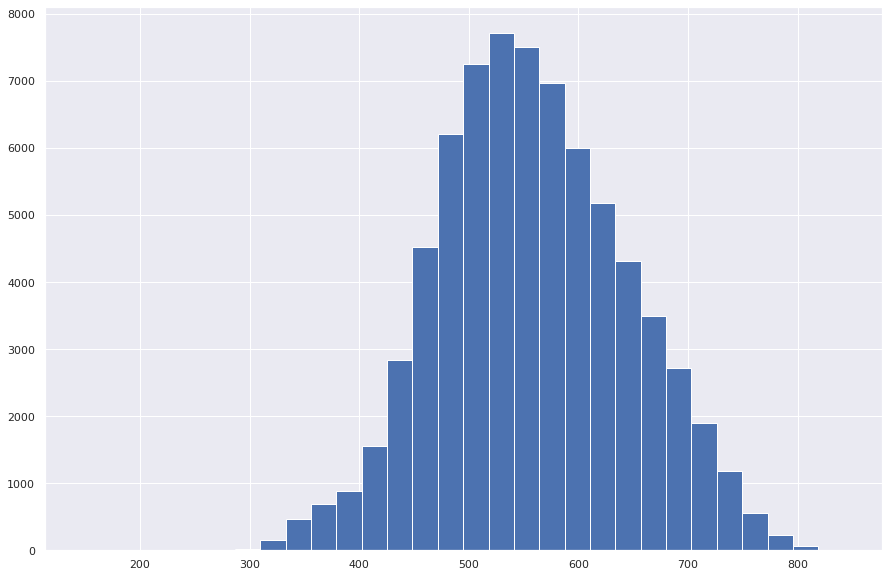

In [111]:
#Município deve ser filtrado alterando o valor da variável "municipio"

municipio = "Belo Horizonte"

# Criando filtro por município
hist_municipio = enem[enem['NO_MUNICIPIO_RESIDENCIA'] == municipio]['mean'].sort_values()

# Exibindo gráfico
hist_municipio.hist(bins = 30,figsize=[15,10])

#### Distribuição das notas por estado

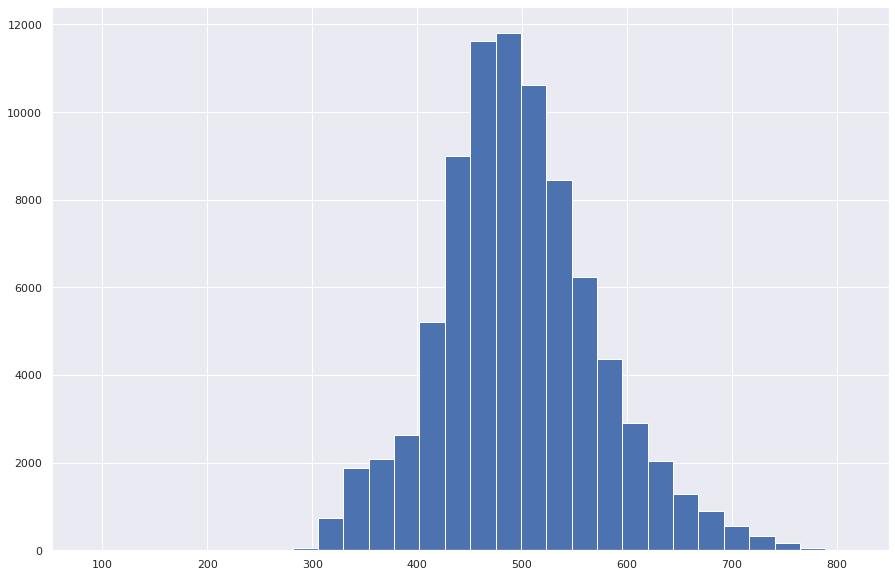

In [113]:
estado = 'AL'

# Criando filtro por estado
hist_estado = enem[enem['SG_UF_RESIDENCIA'] == estado]['mean'].sort_values()

# Exibindo gráfico
hist_estado.hist(bins = 30,figsize=[15,10])

#### Distribuição das notas por região

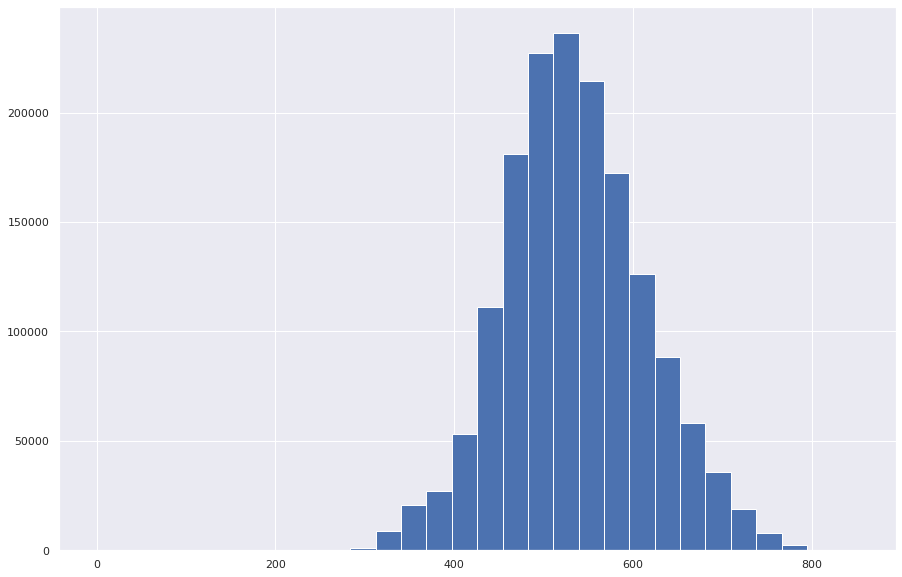

In [114]:
regiao = 'Sudeste'

# Criando filtro por estado
hist_regiao = enem[enem['regiao'] == regiao]['mean'].sort_values()

# Exibindo gráfico
hist_regiao.hist(bins = 30,figsize = [15,10])

## Mapa geográfico com notas

In [121]:
cidades.head(3)

,Município,Código,Gentílico,Prefeito_2017,Área_Territorial_2018,População_estimada_pessoas_2019,Densidade_demográfica_2010,Escolarização_6_a_14_anos_%_2010,IDHMunicipal_2010,Mortalidade_infantil_óbitos_por_mil_nascidos_vivos_2017,Receitas_realizadas_×1000_2017,Despesas_empenhadas_×1000_2017,PIB_per_capita_2017
0,Adamantina,3500105,adamantinense,MÁRCIO CARDIM,"411,987",35068,"82,15","97,6","0,79","11,63","160718,6793","137083,6699","30010,56"
1,Adolfo,3500204,adolfino,IZAEL ANTONIO FERNANDES,"211,055",3562,"16,85","98,6","0,73","19,23","27333,74731","20103,87713","27634,98"
2,Aguaí,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,"474,554",36305,"67,72","95,8","0,715","16,06","84094,76006","72168,73408","26549,19"


In [117]:
enem.head(3)

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,CO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,mean,regiao
0,170003336736,Araraquara,3503208,SP,29.0,445.4,589.0,621.5,465.5,560.0,536.28,Sudeste
3,170001663645,Lages,4209300,SC,35.0,604.0,610.4,563.9,591.2,580.0,589.90,Sul
4,170001663646,Maceió,2704302,AL,40.0,482.1,569.2,570.8,584.6,580.0,557.34,Nordeste


In [135]:
# Calculando média de notas por cidade
media_cidade = enem.groupby('CO_MUNICIPIO_RESIDENCIA').mean()

# Conectando a tabela "cidades" com a tabela "media_cidade" para obter os valores de PIB e IDH
mapa = pd.merge(cidades,media_cidade,left_on= 'Código', right_on = 'CO_MUNICIPIO_RESIDENCIA')[['Código','Município','IDHMunicipal_2010','PIB_per_capita_2017','mean']]

In [136]:
mapa.head()

,Código,Município,IDHMunicipal_2010,PIB_per_capita_2017,mean
0,3500105,Adamantina,"0,79","30010,56",545.878542
1,3500204,Adolfo,"0,73","27634,98",499.107907
2,3500303,Aguaí,"0,715","26549,19",538.790674
3,3500402,Águas da Prata,"0,781","18974,98",536.590602
4,3500501,Águas de Lindóia,"0,745","25554,26",542.984768


In [137]:
# Conectando a tabela "mapa" com a tabela "BR_localidades" para obter os valores de latitude e longitude dos municípios
mapa = pd.merge(mapa,BR_localidades,left_on = 'Código', right_on = 'CD_GEOCODMU')[['Código','Município','LONG','LAT',
                                                                                   'IDHMunicipal_2010','PIB_per_capita_2017','mean']]
mapa.head()

,Código,Município,LONG,LAT,IDHMunicipal_2010,PIB_per_capita_2017,mean
0,3500105,Adamantina,-51.073365,-21.688311,"0,79","30010,56",545.878542
1,3500204,Adolfo,-49.649721,-21.232730,"0,73","27634,98",499.107907
2,3500303,Aguaí,-46.979693,-22.059684,"0,715","26549,19",538.790674
3,3500402,Águas da Prata,-46.716767,-21.934829,"0,781","18974,98",536.590602
4,3500501,Águas de Lindóia,-46.631779,-22.473822,"0,745","25554,26",542.984768


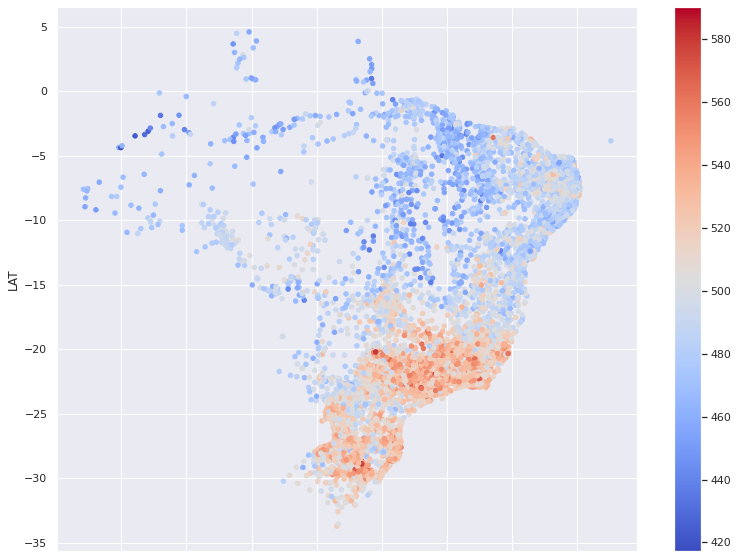

In [139]:
# Plot de pontos que representam as notas médias de cada cidade. Quanto mais quente a cor, maior a média do município
mapa.plot.scatter(y = 'LAT', x = 'LONG', c = mapa['mean'] , cmap = "coolwarm" ,figsize = (13,10))

## Notas por população

In [142]:
# Extraindo colunas "Municipio" e "População" da tabela "cidades"
cidades_populacao = cidades[['Município','População_estimada_pessoas_2019']]

In [144]:
cidades_populacao.head(2)

,Município,População_estimada_pessoas_2019
0,Adamantina,35068
1,Adolfo,3562


In [146]:
# Calculando a média de nota por cidade
media_cidade = enem.groupby('NO_MUNICIPIO_RESIDENCIA').mean()['mean']


In [147]:
# Conectando a tabela "cidades_população" com a tabela "media_cidade"
new_df = pd.merge(cidades_populacao,media_cidade,left_on='Município',right_on='NO_MUNICIPIO_RESIDENCIA') [['População_estimada_pessoas_2019','mean']]

In [148]:
# Ordenando os valores da nova tabela
new_df.sort_values(by= 'População_estimada_pessoas_2019', inplace = True)

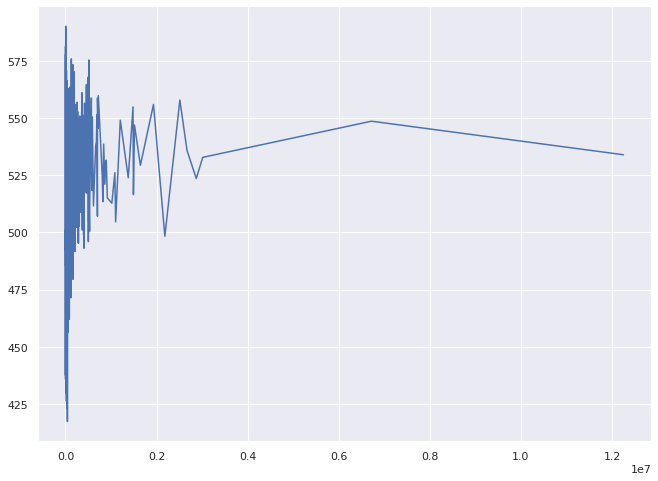

In [185]:
# Exibindo grafico Notas x População
plt.plot(new_df['População_estimada_pessoas_2019'],new_df['mean'])
plt.gcf().set_size_inches(11, 8)
plt.show()


In [ ]:
# Dentre as cidades de menor população não existe um padrão. 
# As cidades com população entre 600 e 800 mil habitantes tendem a ter maior média de notas.
# Cidades com população acima de 1 milhão de habitantes tenndem a ter  menor média de notas.

## Mapa de calor: media de notas por cidade x IDH

In [190]:
# Extraindo as colunas da tabela "cidades" que irão compor o mapa de calor
cidades_heatmap = cidades[['Município','População_estimada_pessoas_2019','Escolarização_6_a_14_anos_%_2010','IDHMunicipal_2010']]
cidades.head()

,Município,Código,Gentílico,Prefeito_2017,Área_Territorial_2018,População_estimada_pessoas_2019,Densidade_demográfica_2010,Escolarização_6_a_14_anos_%_2010,IDHMunicipal_2010,Mortalidade_infantil_óbitos_por_mil_nascidos_vivos_2017,Receitas_realizadas_×1000_2017,Despesas_empenhadas_×1000_2017,PIB_per_capita_2017
0,Adamantina,3500105,adamantinense,MÁRCIO CARDIM,"411,987",35068,"82,15","97,6","0,79","11,63","160718,6793","137083,6699","30010,56"
1,Adolfo,3500204,adolfino,IZAEL ANTONIO FERNANDES,"211,055",3562,"16,85","98,6","0,73","19,23","27333,74731","20103,87713","27634,98"
2,Aguaí,3500303,aguaiano,JOSÉ ALEXANDRE PEREIRA DE ARAÚJO,"474,554",36305,"67,72","95,8","0,715","16,06","84094,76006","72168,73408","26549,19"
3,Águas da Prata,3500402,pratense,CARLOS HENRIQUE FORTES DEZENA,"142,673",8180,"53,05","98,8","0,781","25,32","29390,24814","24363,40149","18974,98"
4,Águas de Lindóia,3500501,lindoiense,GILBERTO ABDOU HELOU,"60,126",18705,"287,16","96,2","0,745","8,37","86949,22213","75201,47793","25554,26"


In [170]:
# Calculando a nota media por cidade
media_cidade = enem.groupby('NO_MUNICIPIO_RESIDENCIA').mean()['mean']

# Conectando a tabela "cidades" com a tabela "media_cidade" para se ter a informação da nota média por cidade 
score_heatmap = pd.merge(cidades_heatmap,media_cidade,left_on='Município',right_on='NO_MUNICIPIO_RESIDENCIA') [['Município','IDHMunicipal_2010','População_estimada_pessoas_2019','Escolarização_6_a_14_anos_%_2010','mean']]

In [191]:
#Verificando tipos de colunas
score_heatmap.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 0 to 5548
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Município                         5544 non-null   object 
 1   IDHMunicipal_2010                 5544 non-null   float64
 2   População_estimada_pessoas_2019   5544 non-null   int64  
 3   Escolarização_6_a_14_anos_%_2010  5544 non-null   float64
 4   mean                              5544 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 259.9+ KB


In [171]:
# Filtrando valores nulos de IDH e escolarização
score_heatmap = score_heatmap[(score_heatmap['IDHMunicipal_2010'] != '-') & (score_heatmap['Escolarização_6_a_14_anos_%_2010'] != '-')]

#Substituindo "," por "." para converter as colunas para float
score_heatmap['IDHMunicipal_2010'] = score_heatmap['IDHMunicipal_2010'].str.replace(',','.')
score_heatmap['Escolarização_6_a_14_anos_%_2010'] = score_heatmap['Escolarização_6_a_14_anos_%_2010'].str.replace(',','.')

#Convertendo as colunas para float
score_heatmap['IDHMunicipal_2010'] = score_heatmap['IDHMunicipal_2010'].astype(float)
score_heatmap['Escolarização_6_a_14_anos_%_2010'] = score_heatmap['Escolarização_6_a_14_anos_%_2010'].astype(float)


In [192]:
score_heatmap.info()
score_heatmap.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5544 entries, 0 to 5548
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Município                         5544 non-null   object 
 1   IDHMunicipal_2010                 5544 non-null   float64
 2   População_estimada_pessoas_2019   5544 non-null   int64  
 3   Escolarização_6_a_14_anos_%_2010  5544 non-null   float64
 4   mean                              5544 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 259.9+ KB


,Município,IDHMunicipal_2010,População_estimada_pessoas_2019,Escolarização_6_a_14_anos_%_2010,mean
0,Adamantina,0.790,35068,97.6,545.878542
1,Adolfo,0.730,3562,98.6,499.107907
2,Aguaí,0.715,36305,95.8,538.790674


In [194]:
# Cálculo da correlação entre as colunas
print(score_heatmap.corr())

                                  IDHMunicipal_2010  ...      mean
IDHMunicipal_2010                          1.000000  ...  0.713061
População_estimada_pessoas_2019            0.142981  ...  0.111040
Escolarização_6_a_14_anos_%_2010           0.368751  ...  0.279993
mean                                       0.713061  ...  1.000000

[4 rows x 4 columns]


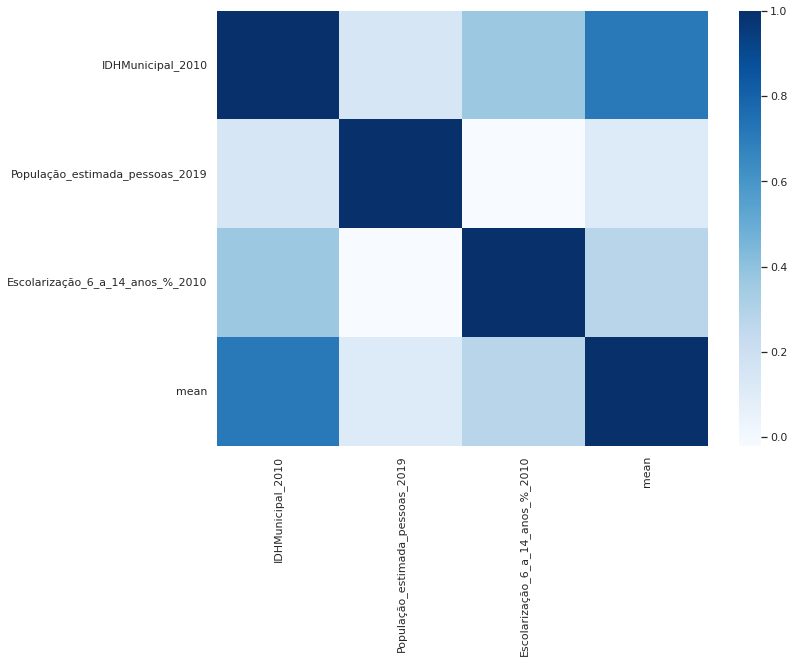

In [195]:
# Plotando correlation heatmap (quanto maior o tom de azul, maior a correlação)
dataplot = sb.heatmap(score_heatmap.corr(),cmap = "Blues")
plt.gcf().set_size_inches(11, 8)

In [ ]:
# Pode-se observar que existe uma alta correlação alta entre o IDH do município e a média das notas do município
# Existe uma correlação baixa entra a taxa de escolarização entre 6 a 14 anos e a média das notas do município


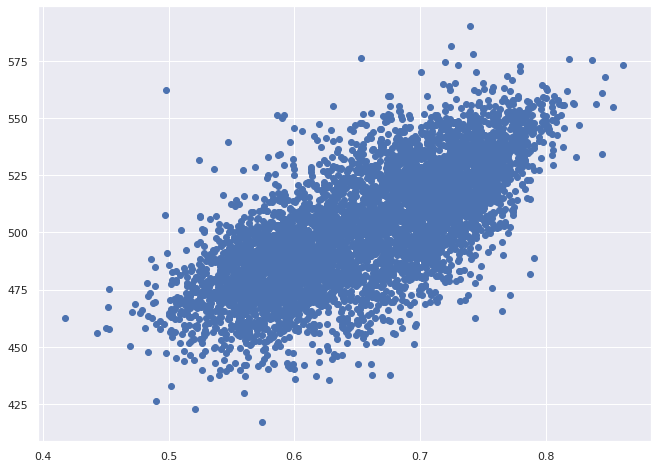

In [197]:
score_idh = score_heatmap[['IDHMunicipal_2010','mean']].sort_values('IDHMunicipal_2010')

plt.scatter(score_idh['IDHMunicipal_2010'],score_idh['mean'])
plt.gcf().set_size_inches(11, 8)
plt.show()

In [ ]:
# A relação entre Media e IDH é comprovada no scatter plot

## Boxplots

### Boxplot Notas por escolaridade
##### Existe alguma relação entre a escolaridade e as notas?

In [186]:
df.head(2)

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,mean
0,170003336736,3503208,Araraquara,SP,29.0,F,1,1,445.4,589.0,621.5,465.5,560.0,D,507.56
3,170001663645,4209300,Lages,SC,35.0,F,1,1,604.0,610.4,563.9,591.2,580.0,D,588.62


In [187]:
# Dicionário de escolaridade
escolaridade = {1:"Não respondeu",2:"Pública",3:"Privada",4:"Exterior"}
enem_escolaridade = df[['TP_ESCOLA','mean']]
enem_escolaridade['TP_ESCOLA'] = enem_escolaridade['TP_ESCOLA'].apply(lambda x: escolaridade[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


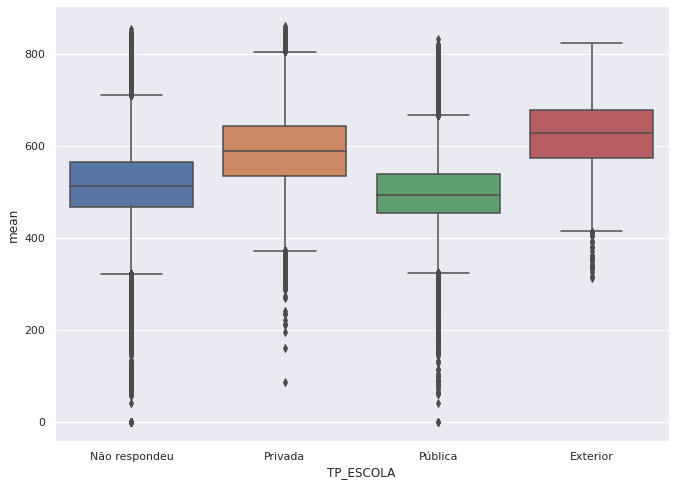

In [189]:
# Plot do gráfico
sb.boxplot(x = enem_escolaridade['TP_ESCOLA'],y = enem_escolaridade['mean'])
plt.gcf().set_size_inches(11, 8)

In [ ]:
# Através do boxplot é possível observar que quem estudou no exterior obteve maiores notas seguido dos que estudaram em escolas privadas.
# Os que estudaram em escolas públicas obtiveram rendimento inferior

In [19]:
df.head()

,NU_INSCRICAO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_COR_RACA,TP_ESCOLA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q006,mean
0,170003336736,3503208,Araraquara,SP,29.0,F,1,1,445.4,589.0,621.5,465.5,560.0,D,507.56
3,170001663645,4209300,Lages,SC,35.0,F,1,1,604.0,610.4,563.9,591.2,580.0,D,588.62
4,170001663646,2704302,Maceió,AL,40.0,M,3,1,482.1,569.2,570.8,584.6,580.0,C,539.92
5,170001663647,4303103,Cachoeirinha,RS,20.0,F,1,1,558.8,594.9,522.8,578.5,540.0,J,551.78
6,170003334115,4106902,Curitiba,PR,36.0,M,2,1,625.9,636.8,588.3,607.5,400.0,D,569.52


### Boxplot Notas por renda familiar
#####Existe alguma relação entre a renda familiar e as notas?

In [198]:
# Dicionário de renda familiar
renda = {
'A':	'Nenhuma renda.',
'B':	'Até R$ 937,00.',
'C':	'De R$ 937,01 até R$ 1.405,50.',
'D':	'De R$ 1.405,51 até R$ 1.874,00.',
'E':	'De R$ 1.874,01 até R$ 2.342,50.',
'F':	'De R$ 2.342,51 até R$ 2.811,00.',
'G':	'De R$ 2.811,01 até R$ 3.748,00.',
'H':	'De R$ 3.748,01 até R$ 4.685,00.',
'I':	'De R$ 4.685,01 até R$ 5.622,00.',
'J':	'De R$ 5.622,01 até R$ 6.559,00.',
'K':	'De R$ 6.559,01 até R$ 7.496,00.',
'L':	'De R$ 7.496,01 até R$ 8.433,00.',
'M':	'De R$ 8.433,01 até R$ 9.370,00.',
'N':	'De R$ 9.370,01 até R$ 11.244,00.',
'O':	'De R$ 11.244,01 até R$ 14.055,00.',
'P':	'De R$ 14.055,01 até R$ 18.740,00.',
'Q':	'Mais de R$ 18.740,00.'
}
enem_renda = df[['Q006','mean']]
enem_renda['Q006'] = enem_renda['Q006'].apply(lambda x: renda[x])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


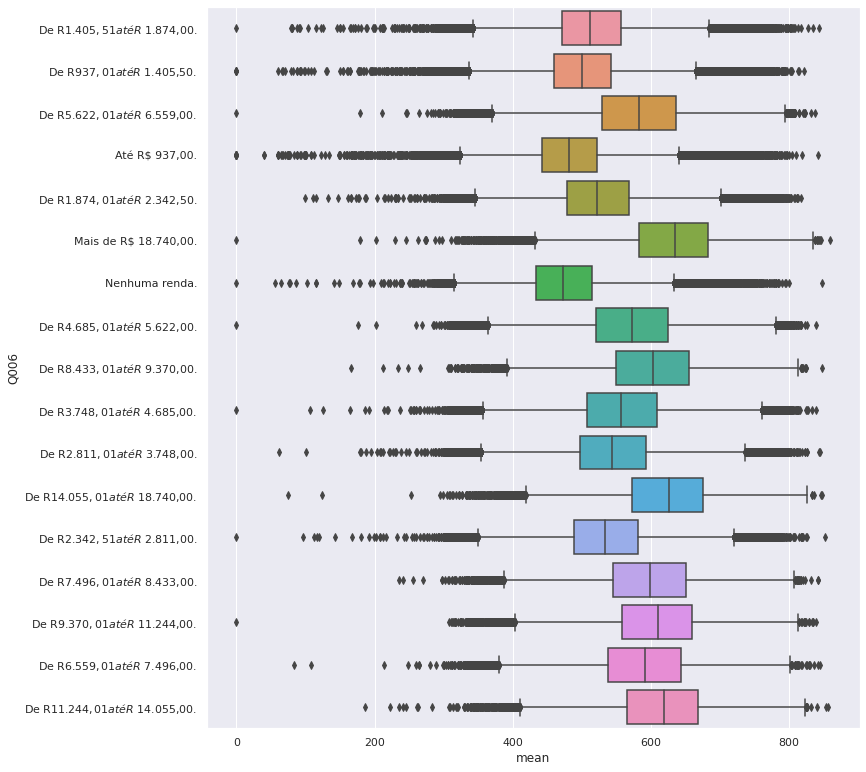

In [199]:
# Plot do gráfico
sb.boxplot(x = enem_renda['mean'],y = enem_renda['Q006'],orient="h")
sb.set(rc={'figure.figsize':(11.7,13.27)})

In [200]:
# Pode se perceber que os grupos com menores notas são os que não possuem nenhuma renda ou renda até R$ 937,00
# Os grupos de maiores notas são os que possuem renda familiar entre 14 e 18,7 mil reais e acima de 18,7 mil reais

# Export

In [ ]:
# Exportando dados já tratados para criar visualizações no Power BI
df.to_csv('/content/drive/MyDrive/Colab Notebooks/Enem 2017/Dados ENEM (tratados).csv')